In [1]:
import import_ipynb
import warnings
warnings.filterwarnings('ignore')
from colorit import *
init_colorit()

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
 


In [2]:
# data inspection

In [3]:
coint_prices = pd.read_csv('data.csv',index_col = 'Date')
coint_prices.head(10)

,BABA,FB
Date,,
2016-01-04,76.690002,102.220001
2016-01-05,78.629997,102.730003
2016-01-06,77.330002,102.970001
2016-01-07,72.720001,97.919998
2016-01-08,70.800003,97.330002
2016-01-11,69.919998,97.510002
2016-01-12,72.680000,99.370003
2016-01-13,70.290001,95.440002
2016-01-14,72.250000,98.370003


Text(0.5, 1.0, 'Facebook vs Alibaba')

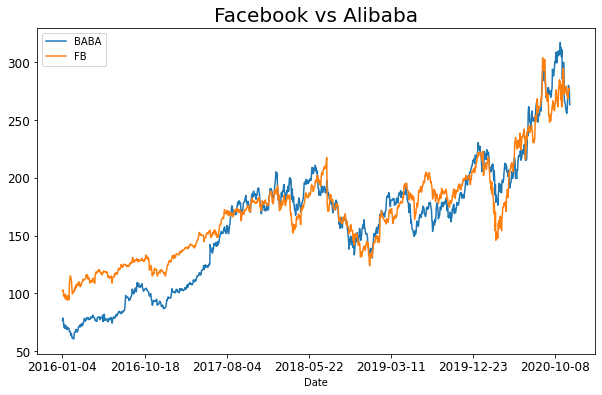

In [4]:
coint_prices.plot(figsize = (10,6), 
                  fontsize = 12,)
plt.title('Facebook vs Alibaba',
          fontsize = 20)

Text(0.5, 1.0, 'Alibaba - Facebook price difference')

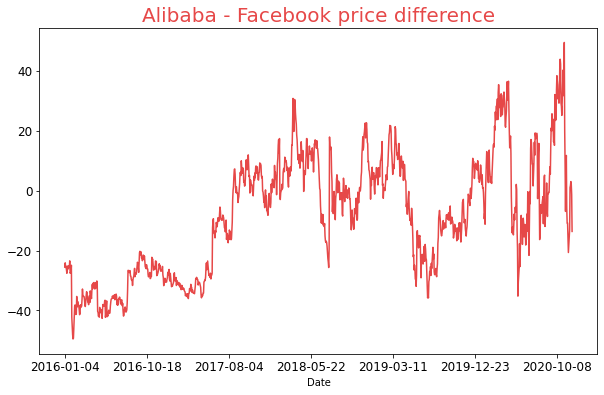

In [5]:
prices_diff = coint_prices.BABA - coint_prices.FB
prices_diff.plot(figsize = (10,6), 
                  fontsize = 12,
                color = '#E64848')
plt.title('Alibaba - Facebook price difference',
          fontsize = 20,
         color = '#E64848')

Text(0.5, 1.0, 'Facebook vs Alibaba')

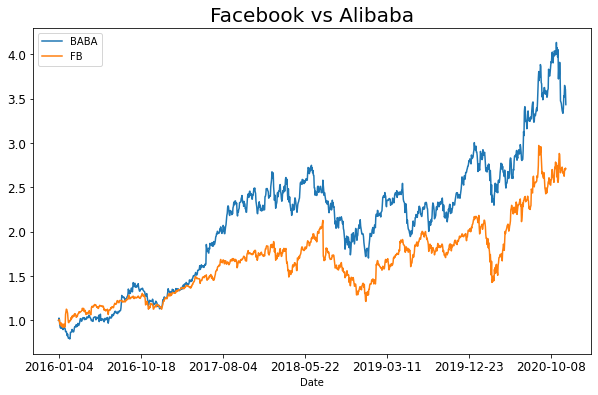

In [6]:
coint_prices = coint_prices/coint_prices.iloc[0]
coint_prices.plot(figsize = (10,6), 
                  fontsize = 12,)
plt.title('Facebook vs Alibaba',fontsize = 20)

In [7]:
# return

In [8]:
returns = np.log(coint_prices).diff().dropna()
returns.head()

,BABA,FB
Date,,
2016-01-05,0.024982,0.004977
2016-01-06,-0.016671,0.002333
2016-01-07,-0.061466,-0.050287
2016-01-08,-0.026757,-0.006044
2016-01-11,-0.012507,0.001848


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f812f2dc7f0>,
      dtype=object)

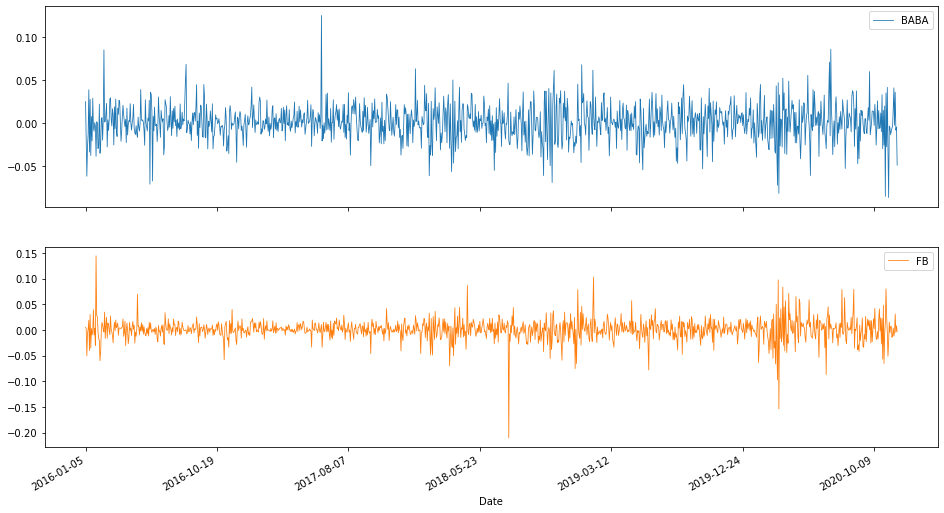

In [9]:
returns.plot(figsize = (16,9),subplots = True, linewidth = 0.8)

In [10]:
returns

,BABA,FB
Date,,
2016-01-05,0.024982,0.004977
2016-01-06,-0.016671,0.002333
2016-01-07,-0.061466,-0.050287
2016-01-08,-0.026757,-0.006044
2016-01-11,-0.012507,0.001848
...,...,...
2020-11-23,-0.002330,-0.004720
2020-11-24,0.035817,0.031139
2020-11-25,-0.008033,-0.004814


In [11]:
from utility import VAR

importing Jupyter notebook from utility.ipynb
[*]We reject the  𝐻0  hypothesis of unit root. The residuals are stationary.


In [12]:
model = VAR(returns, lag = 1)
model.report()

Estimate Coefficient           SD of Estimate            \
                              BABA        FB           BABA        FB   
(Lag_1, BABA)             0.026525 -0.030452       0.032299  0.032653   
(Lag_1, FB)              -0.045617 -0.078142       0.031753  0.032102   
constant                  0.001008  0.000901       0.000588  0.000595   

              t-Statistic            
                     BABA        FB  
(Lag_1, BABA)    0.821254 -0.932594  
(Lag_1, FB)     -1.436612 -2.434177  
constant         1.712616  1.515292

In [13]:
model.p_value < 0.05

,BABA,FB
"(Lag_1, BABA)",False,False
"(Lag_1, FB)",False,True
constant,False,False


In [14]:
model.IC(lag = 10,)

,AIC,BIC
Lag,,
1,-15.740571,-15.715718
2,-15.736774,-15.695353
3,-15.738975,-15.680986
4,-15.734060,-15.659503
5,-15.730489,-15.639363
6,-15.731600,-15.623906
7,-15.733265,-15.609002
8,-15.739999,-15.599167
9,-15.737229,-15.579829


In [15]:
model.stability()

Stability status: [o] STABLE


# Cointegration

In [16]:
coint_prices = pd.read_csv('data.csv',index_col = 'Date')
FB = pd.DataFrame(coint_prices['FB'])
BABA = pd.DataFrame(coint_prices['BABA'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8130933370>,
      dtype=object)

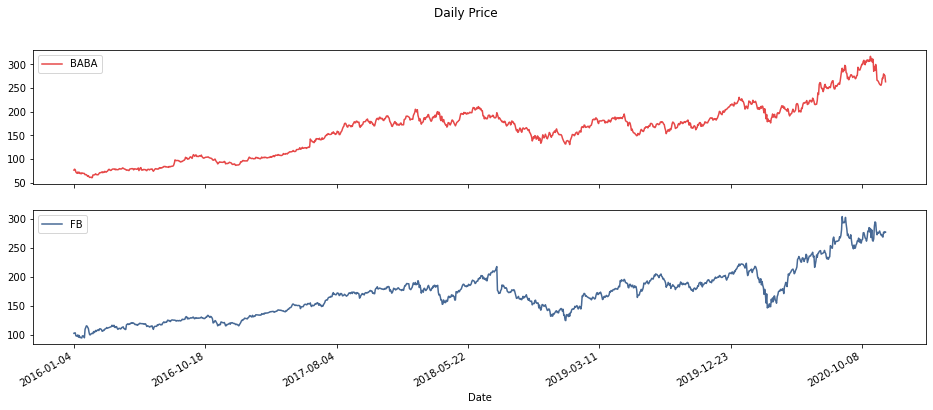

In [17]:
coint_prices.plot( figsize = (16,6),
                  color = ['#E64848','#476995'],
                  subplots = True,
                 title = 'Daily Price',)

In [18]:
#Engle Granger step 1

In [19]:
from utility import LinearRegression as LR

In [20]:
model = LR(x = BABA, y = FB) 
model.report()


,Estimate Coefficient,SD of Estimate,t-Statistic
,FB,FB,FB
BABA,0.729003,0.006459,112.858842
constant,52.451564,1.105572,47.442911


In [21]:
residuals = pd.DataFrame(model.error.reshape(1,1237)[0],
                         index = BABA.index,
                         columns = ['Residual'])
residuals

,Residual
Date,
2016-01-04,-6.138810
2016-01-05,-7.043070
2016-01-06,-5.855372
2016-01-07,-7.544670
2016-01-08,-6.734982
...,...
2020-11-23,19.067420
2020-11-24,20.376756
2020-11-25,20.679699


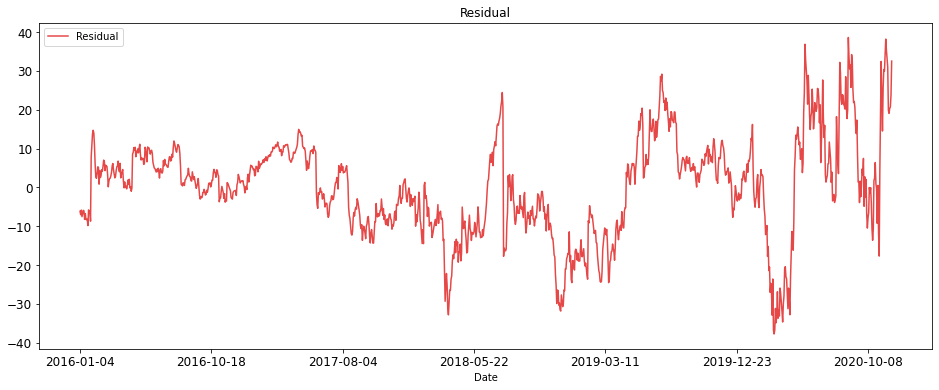

In [22]:
residuals.plot(figsize = (16,6),
              color = '#E64848',
              title = 'Residual',
              fontsize = 12)

In [23]:
from utility import ADF

In [24]:
adf_test = ADF(residuals)
adf_test.report()

[*]We reject the  𝐻0  hypothesis of unit root. The residuals are stationary.


,Estimate Coefficient,SD of Estimate,t-Statistic
,(ΔResidual),(ΔResidual),(ΔResidual)
"(Lag 1, Residual)",-0.036935,0.007962,-4.638897
"(Lag 1, ΔResidual)",0.015089,0.028612,0.527379
constant,0.030886,0.099154,0.311499
